In [1]:
import numpy as np
import pandas as pd
#think before removing data - cant just chuck it because it doesnt help

Problem: Given features predict income

Exploratory Data Analysis:
. description states that missing values in this data set are denoted with a '?'; so parse NaN = ?
. since theres no header in the dataset itself, it shouldnt be generated from one of the rows

In [2]:
adult_dataframe = pd.read_csv("data/complete-adult.csv",na_values='?',header=None)
adult_dataframe.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_dataframe.shape
#for more meaningful column names
cols = ["age","work class","final weight","education","education years","marital status","occupation","relationship in family","race","sex","capital gain","capital loss","weekly hours","native country","income"]
adult_dataframe.columns = cols

checking income distribution:

In [4]:
def check_income_distribution(df):
    above_50_counter = 0
    below_50_counter = 0

    for income in df["income"]:
        if income == "<=50K":
            below_50_counter+=1
        elif income == ">50K":
            above_50_counter+=1
    print(below_50_counter/df.shape[0]*100,"%",above_50_counter/df.shape[0]*100,"%")
check_income_distribution(adult_dataframe)

76.07182343065395 % 23.928176569346054 %


sources of dirty values: it contain lot's of outlier, missing value, or others intentionly wrong filling. 
dealing with missing values:

In [5]:
adult_dataframe.isna().sum()
# no_of_na/adult_dataframe.shape[0]*100


age                          0
work class                2799
final weight                 0
education                    0
education years              0
marital status               0
occupation                2809
relationship in family       0
race                         0
sex                          0
capital gain                 0
capital loss                 0
weekly hours                 0
native country             857
income                       0
dtype: int64

In [6]:
adult_dataframe.info()
adult_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     48842 non-null  int64 
 1   work class              46043 non-null  object
 2   final weight            48842 non-null  int64 
 3   education               48842 non-null  object
 4   education years         48842 non-null  int64 
 5   marital status          48842 non-null  object
 6   occupation              46033 non-null  object
 7   relationship in family  48842 non-null  object
 8   race                    48842 non-null  object
 9   sex                     48842 non-null  object
 10  capital gain            48842 non-null  int64 
 11  capital loss            48842 non-null  int64 
 12  weekly hours            48842 non-null  int64 
 13  native country          47985 non-null  object
 14  income                  48842 non-null  object
dtypes:

(48842, 15)

since its not a lot of rows with unknown values, we'll drop them for now, but will keep in mind that the work class and occupation unknowns seem to be related? also should be remove nan or replace with average/most_frequent?

In [7]:
adult_df_nadrop = adult_dataframe.dropna() #this doesnt change the dataframe directly - so it has so be saved to a variable 
adult_df_nadrop.shape

(45222, 15)

In [8]:
adult_df_nadrop.head()

,age,work class,final weight,education,education years,marital status,occupation,relationship in family,race,sex,capital gain,capital loss,weekly hours,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
check_income_distribution(adult_df_nadrop)

75.21560302507629 % 24.78439697492371 %


outliers:

In [10]:
adult_numerical_df = adult_df_nadrop.select_dtypes(include=['int64', 'float64'])
#using statisticalk techniques to find extremes in data
adult_numerical_df.describe()

,age,final weight,education years,capital gain,capital loss,weekly hours
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


99999 capital gain, along with 99 weekly hours seems a bit off, so i want to inspect them a bit further

In [11]:
# for index,row in adult_df_nadrop.iterrows():
#     if row["capital gain"] == 99999 or row["weekly hours"] == 99:
#         print(row)

print(adult_df_nadrop[adult_df_nadrop["capital gain"] > 50000].shape[0])
#the capital gain certainly doesnt make a lot of sense as theres no data between 50-100k except the 229 values at 99k
print(adult_df_nadrop[adult_df_nadrop["weekly hours"] > 95].shape[0])
#this could be valid as there are other people in that range who also work what may seem like a ridiculous number of hours. thus it would be unwise to remove them

adult_df = adult_df_nadrop[ adult_df_nadrop["capital gain"] < 50000 ]

229
148


removing records without pay or never wrked - description also says that theres people without pay and never worked, and sincd they have (almost) no income, although theyd be classified under 50k, thats not very meaningful

In [12]:
print(adult_df.shape[0])
adult_df = adult_df[ adult_df["work class"] != "Without-pay"  ]
print(adult_df.shape[0])
#that removed abut 20 recrds
adult_df = adult_df[ adult_df["work class"] != "Never-worked" ]
print(adult_df.shape[0])


44993
44972
44972


combine categories 

cmbine Federal-gov, Local-gov, State-gov  toi just gov?

cmbine grades to primary middklke high vocationalk and the rest?
Preschool 1st-4th 5th-6th 7th-8th 9th 10th 11th 12th HS-grad  Assoc-acdm, Assoc-voc, Some-college Prof-school Bachelors Masters Doctorate

note: just pre school is equivalkent to no formalk educatin

In [13]:
combine_gov = ["Federal-gov", "Local-gov", "State-gov"]
primary = ["1st-4th", "5th-6th"]
middle = ["7th-8th", "9th"]
high = ["10th", "11th", "12th", "HS-grad"]
mbohbo = ["Assoc-acdm", "Assoc-voc", "Some-college", "Prof-school"]

#Since inplace argument is available, you don't need to copy and assign the original data frame back to itself
for gov_job in combine_gov:
    adult_df['work class'].replace(gov_job, "government", inplace=True)
# adult_df[ adult_df["work class"] == "Federal-gov" ].shape[0]
for level in primary:
    adult_df["education"].replace(level, "primary school", inplace=True)

for level in middle:
    adult_df["education"].replace(level, "middle school", inplace=True)

for level in high:
    adult_df["education"].replace(level, "high school", inplace=True)

for level in mbohbo:
    adult_df["education"].replace(level, "Associate's Degree/Diploma", inplace=True)

# print(primary+middle+high+mbohbo)

New categries:
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, government.
fnlwgt: continuous.
education: Preschool ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Prof-school'] Bachelors, Masters, Doctorate.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


#maybe we can change income to a boolean where its true if income is greater than 50k(an attempt to simplify data)


In [14]:
adult_df["income"].replace("<=50K", False, inplace=True)
adult_df["income"].replace(">50K", True, inplace=True)
adult_df.rename(columns={'income':'income greater than 50K'}, inplace=True)

In [15]:
adult_df.head()

,age,work class,final weight,education,education years,marital status,occupation,relationship in family,race,sex,capital gain,capital loss,weekly hours,native country,income greater than 50K
0,39,government,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,high school,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,high school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


#convert categories to numbers?

#dealing with income class imbalance

Normalize numerical data

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
adult_df_numerical = adult_df.select_dtypes(include=['int64', 'float64'])
adult_df[adult_df_numerical.columns] = sc.fit_transform(adult_df_numerical) 
cols = ["age","work class","final weight","education","education years","marital status","occupation","relationship in family","race","sex","capital gain","capital loss","weekly hours","native country","income greater than 50K"]
# adult_df_numerical = pd.DataFrame(adult_df_numerical)
# adult_df_numerical.head()
adult_df.head()


,age,work class,final weight,education,education years,marital status,occupation,relationship in family,race,sex,capital gain,capital loss,weekly hours,native country,income greater than 50K
0,0.037577,government,-1.062349,Bachelors,1.138197,Never-married,Adm-clerical,Not-in-family,White,Male,0.613360,-0.219361,-0.074350,United-States,False
1,0.870113,Self-emp-not-inc,-1.007505,Bachelors,1.138197,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.232842,-0.219361,-2.328239,United-States,False
2,-0.038108,Private,0.244920,high school,-0.433837,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.232842,-0.219361,-0.074350,United-States,False
3,1.097168,Private,0.425447,high school,-1.219853,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.232842,-0.219361,-0.074350,United-States,False
4,-0.794960,Private,1.406755,Bachelors,1.138197,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.232842,-0.219361,-0.074350,Cuba,False


maybe exclkude finalk weight im nt sure hw much that helkps

In [61]:
from sklearn.preprocessing import LabelEncoder

numeral_cols = adult_df.select_dtypes(include='number').columns
adult_df_num = adult_df[numeral_cols]

categorical_cols = adult_df.select_dtypes(include='object').columns
adult_df_cat = adult_df[categorical_cols]

l_encoder = LabelEncoder()



for cat_col in adult_df_cat.columns:
    # Apply the encoder
    adult_df_cat[cat_col] = l_encoder.fit_transform(adult_df_cat[cat_col])
    
    
adult_df_fixed = pd.concat([adult_df_num, adult_df_cat, adult_df['income greater than 50K']], axis=1)

print(adult_df_fixed)

            age  final weight  education years  capital gain  capital loss  \
0      0.037577     -1.062349         1.138197      0.613360     -0.219361   
1      0.870113     -1.007505         1.138197     -0.232842     -0.219361   
2     -0.038108      0.244920        -0.433837     -0.232842     -0.219361   
3      1.097168      0.425447        -1.219853     -0.232842     -0.219361   
4     -0.794960      1.406755         1.138197     -0.232842     -0.219361   
...         ...           ...              ...           ...           ...   
48836 -0.416534      0.524725         1.138197     -0.232842     -0.219361   
48837  0.037577      0.242772         1.138197     -0.232842     -0.219361   
48839 -0.038108      1.752894         1.138197     -0.232842     -0.219361   
48840  0.416002     -1.002016         1.138197      1.890449     -0.219361   
48841 -0.265164     -0.072107         1.138197     -0.232842     -0.219361   

       weekly hours  work class  education  marital status  occ

/var/folders/t9/tzk0z4w91p112dd6gyx65tb80000gn/T/ipykernel_2305/678614237.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df_cat[cat_col] = l_encoder.fit_transform(adult_df_cat[cat_col])


Here we change the nominal attributes to numbers since we need that for our CART algorithm to work

In [62]:
def fixYs(vector):
    new_y = []
    for i in vector:
        if i == False:
            new_y.append(False)
        else:
            new_y.append(True)
    return np.array(new_y)

['age', 'final weight', 'education years', 'capital gain', 'capital loss', 'weekly hours', 'work class', 'education', 'marital status', 'occupation', 'relationship in family', 'race', 'sex', 'native country', 'income greater than 50K']
Accuracy of training:  0.8539214569244509 
Accuracy of testing:  0.8519969886549532
[3.62945738e-02 4.05617907e-03 2.19956391e-01 2.04034387e-01
 4.70277756e-02 3.40726771e-02 3.00616175e-03 4.21397082e-03
 9.14493806e-05 1.55812045e-02 4.30634105e-01 1.55926404e-04
 4.40769544e-04 4.34428221e-04]
Feature: 0(age), Score: 0.03629
Feature: 1(final weight), Score: 0.00406
Feature: 2(education years), Score: 0.21996
Feature: 3(capital gain), Score: 0.20403
Feature: 4(capital loss), Score: 0.04703
Feature: 5(weekly hours), Score: 0.03407
Feature: 6(work class), Score: 0.00301
Feature: 7(education), Score: 0.00421
Feature: 8(marital status), Score: 0.00009
Feature: 9(occupation), Score: 0.01558
Feature: 10(relationship in family), Score: 0.43063
Feature: 11(ra

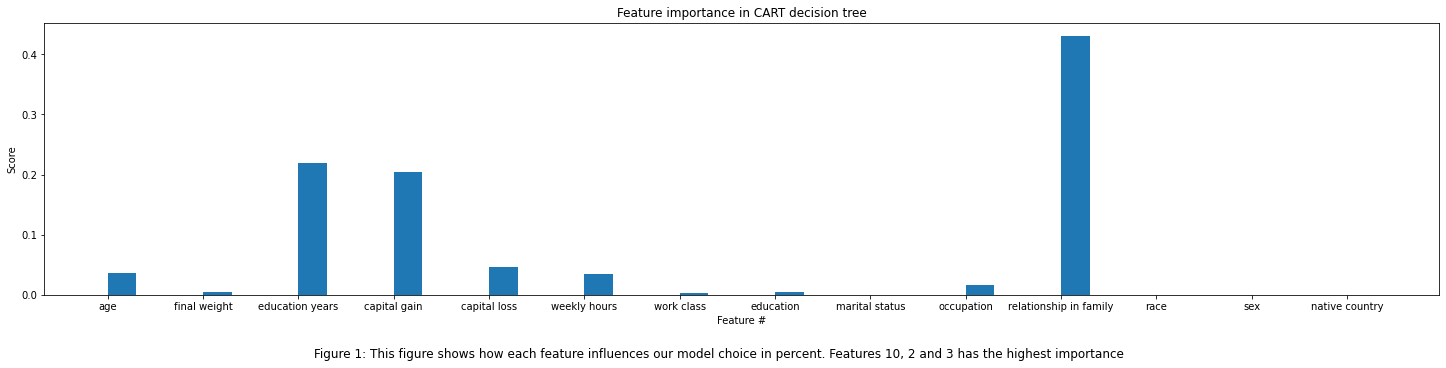

In [87]:
from sklearn.model_selection import KFold
from sklearn import tree
from matplotlib import pyplot



kf = KFold(n_splits = 10)

data = adult_df_fixed.to_numpy()
X = data[:, 0:14]
y = fixYs(data[:, 14])#for some reason it doesn't work unless we apply this fix

fulls = np.zeros((14))

clf = tree.DecisionTreeClassifier(min_samples_split = 750, max_depth = 18)
accuracy_train = 0
accuracy_test = 0
for train_i, test_i in kf.split(X):
    clf.fit(X[train_i], y[train_i])
    importance = clf.feature_importances_
    fulls += importance
    
    accuracy_train += clf.score(X[train_i], y[train_i])
    accuracy_test += clf.score(X[test_i], y[test_i])

column_names = adult_df_fixed.columns.to_numpy()

print([x for x in column_names])
    
print('Accuracy of training: ', accuracy_train/10, '\nAccuracy of testing: ', accuracy_test/10)

fulls /= 10

for i,v in enumerate(fulls):
    print('Feature: %0d(%s), Score: %.5f' % (i, column_names[i],v))
pyplot.figure(figsize = (25, 5))
pyplot.title('Feature importance in CART decision tree')
pyplot.figtext(0.5, -0.05, 'Figure 1: This figure shows how each feature influences our model choice in percent. Features 10, 2 and 3 has the highest importance', wrap=True, horizontalalignment='center', fontsize=12)
pyplot.xlabel('Feature #')
pyplot.ylabel('Score')
pyplot.bar([x for x in column_names[0:14]], fulls, align='edge', width=0.3)
pyplot.show()




Here we can see, that relationship in family has the highest importance, followed by education years and capital gain.

Accuracy of training:  0.8192060252163806 
Accuracy of testing:  0.8190874198727218
Feature: 0(age), Score: 0.46211
Feature: 1(final weight), Score: 0.05582
Feature: 2(education years), Score: 0.83855
Feature: 3(capital gain), Score: 0.81477
Feature: 4(capital loss), Score: 0.26864
Feature: 5(weekly hours), Score: 0.33878
Feature: 6(work class), Score: -0.01481
Feature: 7(education), Score: -0.01164
Feature: 8(marital status), Score: -0.22127
Feature: 9(occupation), Score: -0.00153
Feature: 10(relationship in family), Score: -0.14248
Feature: 11(race), Score: 0.10598
Feature: 12(sex), Score: 0.87600
Feature: 13(native country), Score: 0.00054


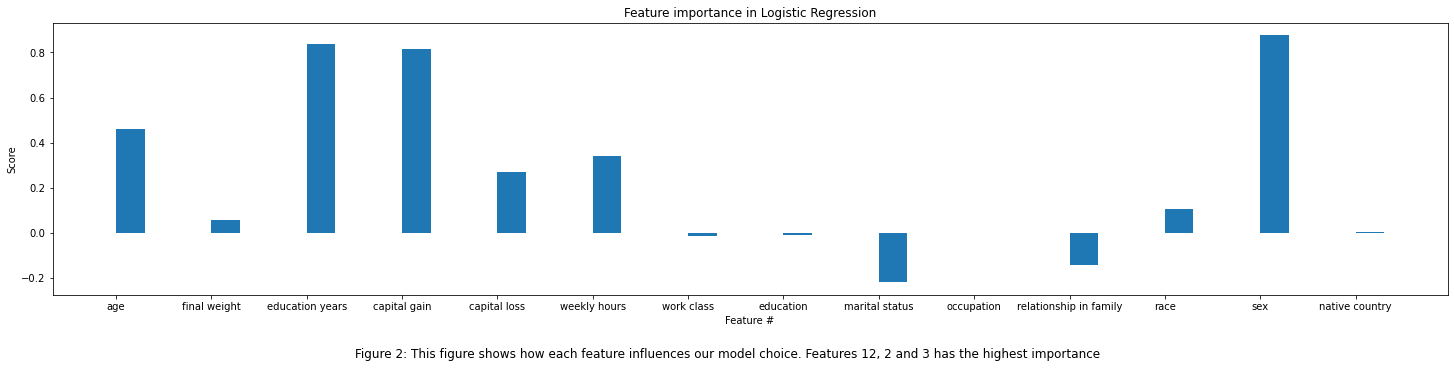

In [89]:
from sklearn import linear_model
    
clf = linear_model.LogisticRegression(max_iter = 10000)
fulls = np.zeros((14))
accuracy_train = 0
accuracy_test = 0
for train_i, test_i in kf.split(X):
    clf.fit(X[train_i], y[train_i])
    importance = clf.coef_[0]
    fulls += importance
    accuracy_train += clf.score(X[train_i], y[train_i])
    accuracy_test += clf.score(X[test_i], y[test_i])

print('Accuracy of training: ', accuracy_train/10, '\nAccuracy of testing: ', accuracy_test/10)

fulls = fulls/10

for i,v in enumerate(fulls):
    print('Feature: %0d(%s), Score: %.5f' % (i, column_names[i],v))
pyplot.figure(figsize = (25, 5))
pyplot.title('Feature importance in Logistic Regression')
pyplot.figtext(0.5, -0.05, 'Figure 2: This figure shows how each feature influences our model choice. Features 12, 2 and 3 has the highest importance', wrap=True, horizontalalignment='center', fontsize=12)
pyplot.xlabel('Feature #')
pyplot.ylabel('Score')
pyplot.bar([x for x in column_names[0:14]], fulls, align='edge', width=0.3)
pyplot.show()

For logistic regression we can see the importance is a little different. Here the most important feature is sex and is closely followed by education years and capital gain. It is worth mentioning that age has a bigger importance than in our decision tree.